## "Exploring Temperature Fluctuations in Egypt, Tunisia, Angola, Cameroon, and Senegal (1980–2023)"



#### Objective
The goal of this project is to analyze and visualize temperature trends and fluctuations across five African countries—Egypt, Tunisia, Angola, Cameroon, and Senegal—to identify patterns, seasonal variations, and possible climate change indicators.

#### Dataset Source
This dataset 'Climate Change in Africa' was provided by the 'U.S global change research program'

*Dataset Description* : This dataset contains historical data about the daily min, max and average temperature fluctuation in 5 African countries (Egypt, Tunisia, Cameroon, Senegal, Angola) between 1980 and 2023.

#### Tools and libraries
- Jupyter noternook
- Pandas
- Matplotlib
- Seaborn
- plotly

In [23]:
# Importing neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [10]:
# loading in the dataset
df = pd.read_csv('Africa_climate_change.csv')
df.head()

,DATE,PRCP,TAVG,TMAX,TMIN,COUNTRY
0,19800101 000000,NaN,54.0,61.0,43.0,Tunisia
1,19800101 000000,NaN,49.0,55.0,41.0,Tunisia
2,19800101 000000,0.0,72.0,86.0,59.0,Cameroon
3,19800101 000000,NaN,50.0,55.0,43.0,Tunisia
4,19800101 000000,NaN,75.0,91.0,NaN,Cameroon


In [5]:
df.shape

(464815, 6)

In [6]:
df.dtypes

DATE        object
PRCP       float64
TAVG       float64
TMAX       float64
TMIN       float64
COUNTRY     object
dtype: object

Date column is in object datatype so i will be changing it to datetime format

In [18]:
# changing the Date datatype
df['DATE'] = pd.to_datetime(df['DATE'])
df.dtypes

DATE       datetime64[ns]
PRCP              float64
TAVG              float64
TMAX              float64
TMIN              float64
COUNTRY            object
dtype: object

In [20]:
# checking for null values
df.isnull().sum()

DATE            0
PRCP       287240
TAVG         6376
TMAX       100914
TMIN       132058
COUNTRY         0
dtype: int64

I will fill the null values as seen above with the following
- PRCP with be filled with 0
- TAVG will be filled with the mean of the column
- TMAX will also be filled the mean of the column
- TMIN also will be filled with the mean

In [25]:
df['PRCP'] = df['PRCP'].fillna(0)
df['TAVG'] = df['TAVG'].fillna(df['TAVG'].mean())
df['TMAX'] = df['TMAX'].fillna(df['TMAX'].mean())
df['TMIN'].fillna(df['TMIN'].mean(), inplace=True)

In [27]:
# checking to confirm if there no longer null values
df.isnull().sum()

DATE       0
PRCP       0
TAVG       0
TMAX       0
TMIN       0
COUNTRY    0
dtype: int64

In [14]:
# checking the description of the numeric columns
df.describe()

,DATE,PRCP,TAVG,TMAX,TMIN
count,464815,464815.000000,464815.000000,464815.000000,464815.000000
mean,2002-10-27 06:36:16.891881856,0.046203,77.029838,88.713969,65.548262
min,1980-01-01 00:00:00,0.000000,-49.000000,41.000000,12.000000
25%,1992-07-02 00:00:00,0.000000,70.000000,84.000000,63.000000
50%,2003-06-29 00:00:00,0.000000,79.000000,88.713969,65.548262
75%,2013-06-30 00:00:00,0.000000,85.000000,96.000000,72.000000
max,2023-08-23 00:00:00,19.690000,110.000000,123.000000,97.000000
std,NaN,0.306211,11.444325,11.540288,9.761109


In [33]:
df = df[df['TAVG'] >= 0] # eliminating the -ve value in TAVG

In [35]:
df.describe()

,DATE,PRCP,TAVG,TMAX,TMIN
count,464814,464814.000000,464814.000000,464814.000000,464814.000000
mean,2002-10-27 06:13:10.086357248,0.046203,77.030109,88.713969,65.548262
min,1980-01-01 00:00:00,0.000000,36.000000,41.000000,12.000000
25%,1992-07-02 00:00:00,0.000000,70.000000,84.000000,63.000000
50%,2003-06-29 00:00:00,0.000000,79.000000,88.713969,65.548262
75%,2013-06-30 00:00:00,0.000000,85.000000,96.000000,72.000000
max,2023-08-23 00:00:00,19.690000,110.000000,123.000000,97.000000
std,NaN,0.306211,11.442844,11.540300,9.761120


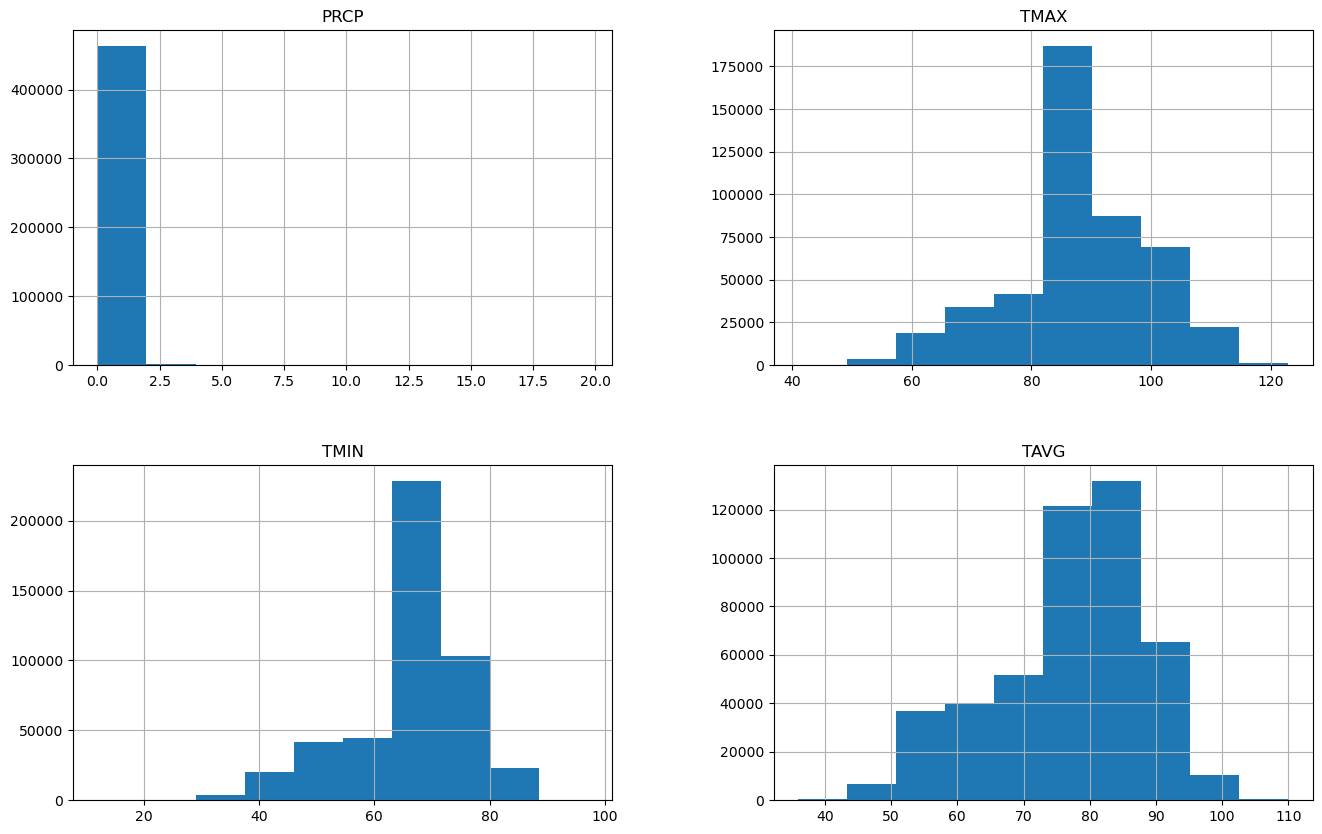

In [55]:
# Showing the distribution of the numeric columns
columns_to_plot = ["PRCP", "TMAX", "TMIN", "TAVG"]

df[columns_to_plot].hist(figsize=(16, 10));

##### The average temperature fluctuations in Tunisia and Cameroon

In [59]:
# Tun_Cam_data which stands for Tunisia and Cameroon data
Tun_Cam_data = df[df['COUNTRY'].isin(['Tunisia', 'Cameroon'])]
Tun_Cam_data.head()

,DATE,PRCP,TAVG,TMAX,TMIN,COUNTRY
0,1980-01-01,0.0,54.0,61.0,43.000000,Tunisia
1,1980-01-01,0.0,49.0,55.0,41.000000,Tunisia
2,1980-01-01,0.0,72.0,86.0,59.000000,Cameroon
3,1980-01-01,0.0,50.0,55.0,43.000000,Tunisia
4,1980-01-01,0.0,75.0,91.0,65.548262,Cameroon


In [61]:
# Group by Date and Country, on the average of TAVG column
avg_temp = Tun_Cam_data.groupby(['DATE', 'COUNTRY'])['TAVG'].mean().unstack()
avg_temp.head()

COUNTRY,Cameroon,Tunisia
DATE,,
1980-01-01,77.000000,50.8
1980-01-02,77.333333,56.0
1980-01-03,80.000000,50.0
1980-01-04,75.333333,49.6
1980-01-05,76.000000,48.2


Now we're plotting a line chart to show the average temperature fluctuations in Tunisia and Cameroon.


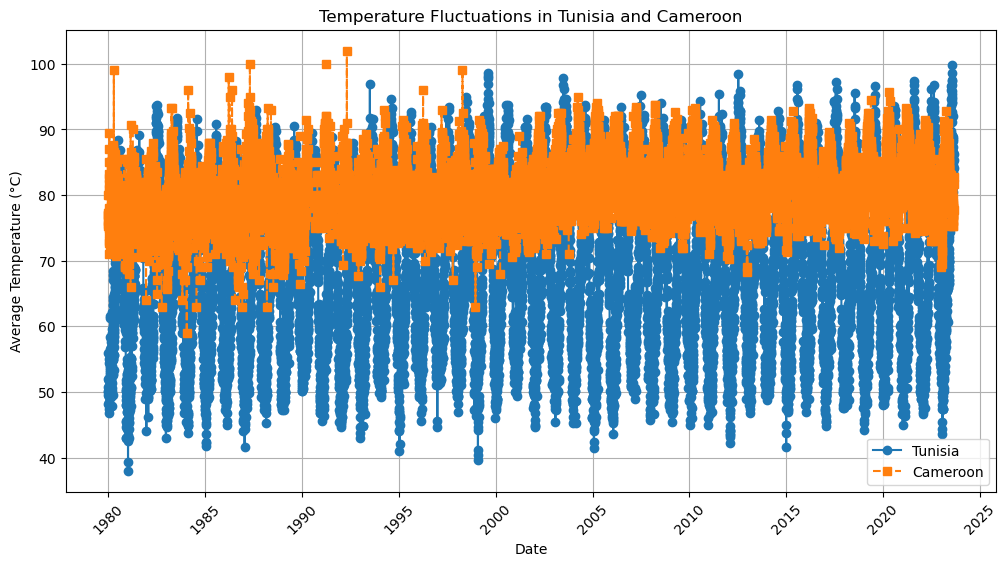

In [64]:
# Plot line chart
plt.figure(figsize=(12, 6))
plt.plot(avg_temp.index, avg_temp['Tunisia'], label='Tunisia', marker='o', linestyle='-')
plt.plot(avg_temp.index, avg_temp['Cameroon'], label='Cameroon', marker='s', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.title('Temperature Fluctuations in Tunisia and Cameroon')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


From the plot above, it can be deduced that Tunisia is colder than cameroonand cameroon's temperature has reduced over the years

##### Tunisia and Cameroon Data between 1980 and 2005

In [76]:
Tun_Cam_start_date = '1980-01-01'
Tun_Cam_end_date = '2005-12-31'
Tun_Cam_1980_2005 = Tun_Cam_data[Tun_Cam_data['DATE'].between(Tun_Cam_start_date, Tun_Cam_end_date)]

In [78]:
avg_temp2 = Tun_Cam_1980_2005.groupby(['DATE', 'COUNTRY'])['TAVG'].mean().unstack()
avg_temp2.head()

COUNTRY,Cameroon,Tunisia
DATE,,
1980-01-01,77.000000,50.8
1980-01-02,77.333333,56.0
1980-01-03,80.000000,50.0
1980-01-04,75.333333,49.6
1980-01-05,76.000000,48.2


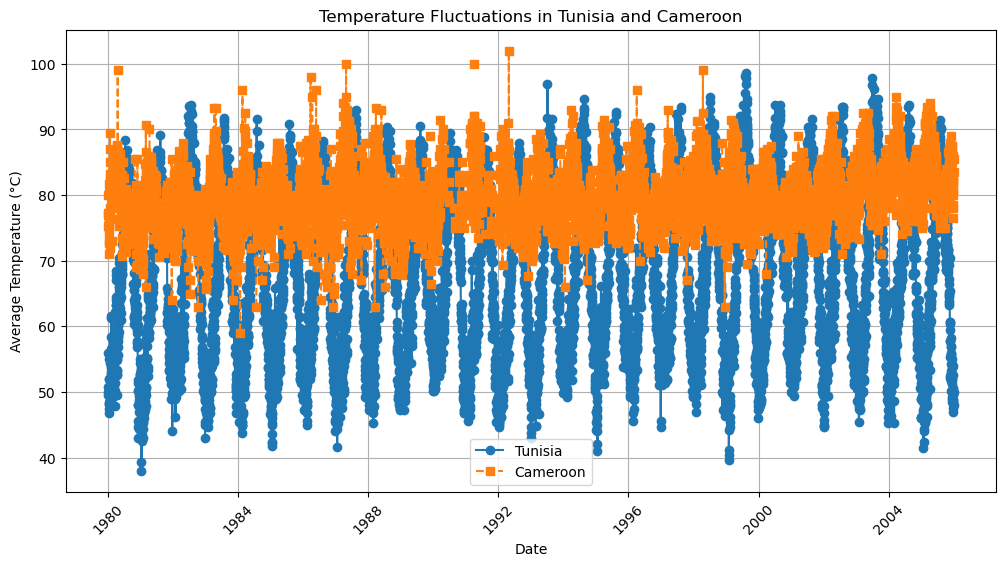

In [80]:
# line chart for Tunisia and Cameroon data between 1980 to 2005
plt.figure(figsize=(12, 6))
plt.plot(avg_temp2.index, avg_temp2['Tunisia'], label='Tunisia', marker='o', linestyle='-')
plt.plot(avg_temp2.index, avg_temp2['Cameroon'], label='Cameroon', marker='s', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.title('Temperature Fluctuations in Tunisia and Cameroon')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

#### Temperature distribution in Senegal between [1980,2000] and [2000,2023] 

In [85]:
sen_data = df[df['COUNTRY'] =='Senegal']
sen_data

,DATE,PRCP,TAVG,TMAX,TMIN,COUNTRY
6,1980-01-01,0.00,76.0,97.000000,59.000000,Senegal
7,1980-01-01,0.00,74.0,95.000000,59.000000,Senegal
8,1980-01-01,0.00,78.0,93.000000,63.000000,Senegal
9,1980-01-01,0.00,76.0,91.000000,59.000000,Senegal
11,1980-01-01,0.00,84.0,99.000000,65.548262,Senegal
...,...,...,...,...,...,...
464803,2023-08-23,1.22,83.0,90.000000,76.000000,Senegal
464807,2023-08-23,0.00,87.0,99.000000,65.548262,Senegal
464808,2023-08-23,0.16,82.0,88.713969,65.548262,Senegal
464810,2023-08-23,0.00,85.0,89.000000,65.548262,Senegal


In [89]:
# Filtering senegal data between 1980 to 20000
sen_start_date = '1980-01-01'
sen_end_date = '2000-12-31'
sen_data_to2000 = sen_data[df['DATE'].between(sen_start_date, sen_end_date)]
sen_data_to2000.head()

,DATE,PRCP,TAVG,TMAX,TMIN,COUNTRY
6,1980-01-01,0.0,76.0,97.0,59.000000,Senegal
7,1980-01-01,0.0,74.0,95.0,59.000000,Senegal
8,1980-01-01,0.0,78.0,93.0,63.000000,Senegal
9,1980-01-01,0.0,76.0,91.0,59.000000,Senegal
11,1980-01-01,0.0,84.0,99.0,65.548262,Senegal


In [93]:
sen_start_date2 = '2000-01-01'
sen_end_date2 = '2023-12-31'
sen_data_to2023 = sen_data[df['DATE'].between(sen_start_date2, sen_end_date2)]
sen_data_to2023.head()

,DATE,PRCP,TAVG,TMAX,TMIN,COUNTRY
198343,2000-01-01,0.0,75.0,85.000000,66.0,Senegal
198345,2000-01-01,0.0,73.0,88.000000,63.0,Senegal
198346,2000-01-01,0.0,75.0,88.000000,64.0,Senegal
198347,2000-01-01,0.0,74.0,90.000000,64.0,Senegal
198348,2000-01-01,0.0,74.0,88.713969,57.0,Senegal


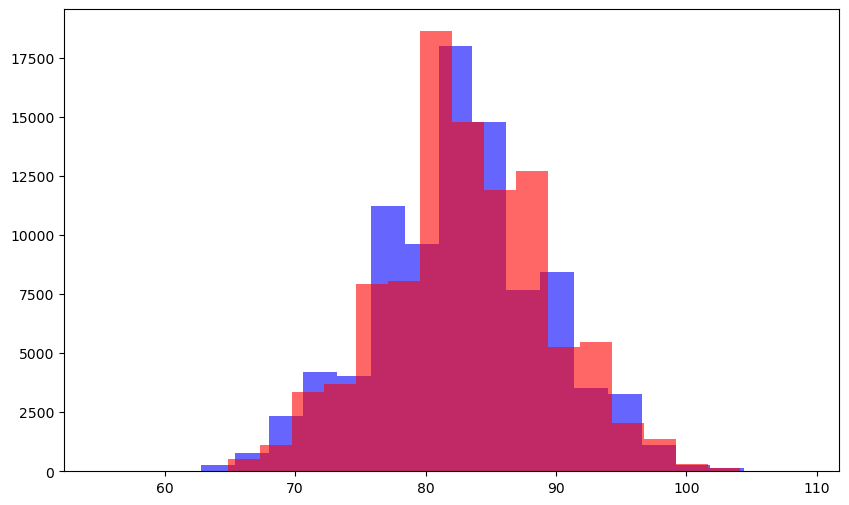

In [97]:
# plotting the histogram of the senegal data between 1980-2000 and 1980-2023
plt.figure(figsize=(10,6))
plt.hist(sen_data_to2000['TAVG'], bins=20, alpha=0.6, label="1980-2000", color="blue")
plt.hist(sen_data_to2023['TAVG'], bins=20, alpha=0.6, label="2000-2023", color="red")
plt.show()

From the above visuals,we can suggests there is warming trends in Senegal.
Also, there is higher temperature variability in recent years.

# Average temperature per country.

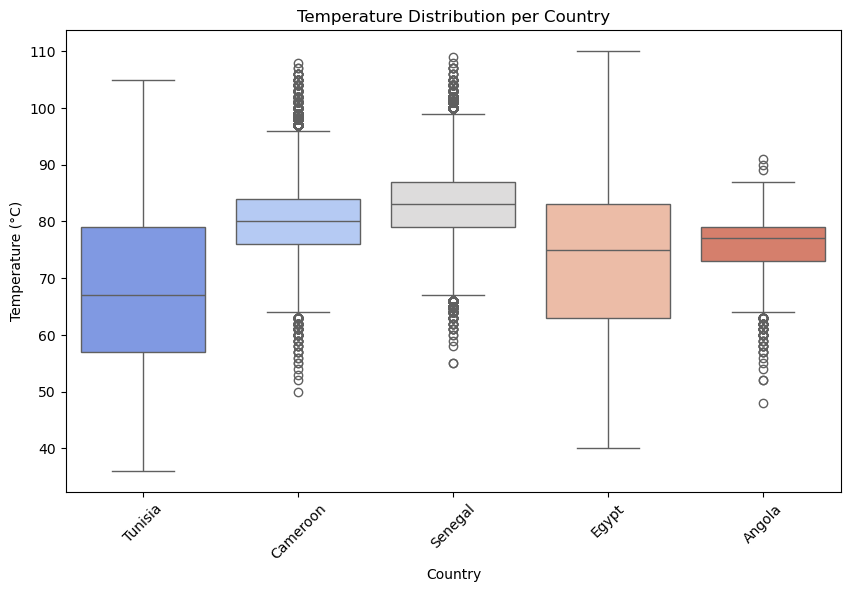

In [106]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="COUNTRY", y="TAVG", palette="coolwarm")

# Customize plot
plt.title("Temperature Distribution per Country")
plt.xlabel("Country")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.show()
